# Seaborn Plotting

### 1. Create a lineplot showing how Study Time varies by Student Name. Which student has the highest study time?

In [1]:
data = {
    'Student Name': ['Amelie', 'Edgar', 'Jordi', 'Marçal', 'Pep', 'Jaume', 'Marco', 
                     'Ludmila', 'Bastian', 'Marc', 'Gerardo', 'Javier', 'Frank', 'Julia'],
    'Course': ['Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision', 
               'Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision', 
               'Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision', 
               'Artificial Intelligence', 'Python for Data Science'],
    'Grade': [85, 92, 78, 88, 91, 84, 73, 95, 90, 80, 85, 87, 89, 92],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female'],
    'Study Time': [15, 20, 10, 8, 18, 14, 11, 16, 19, 13, 16, 12, 17, 15],
    'Age': [22, 21, 23, 22, 20, 24, 22, 21, 23, 21, 22, 22, 21, 20]
}

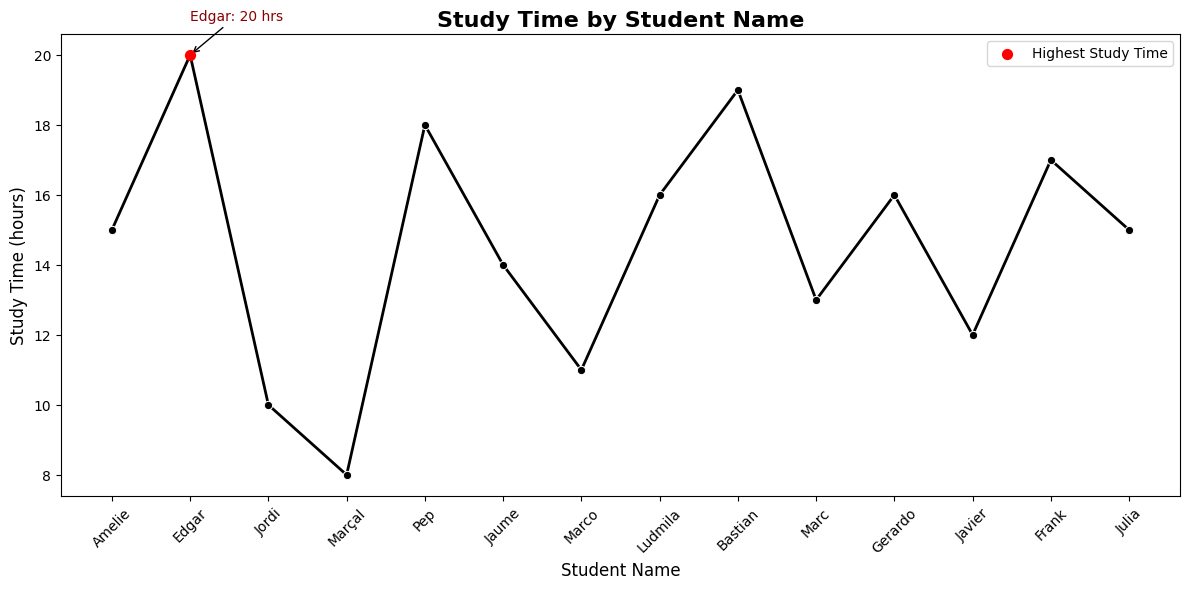

The Top Performer
Student: Edgar
Study Time: 20 hours


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is a dictionary or dataset already defined
df = pd.DataFrame(data)

# Create a line plot for Study Time by Student Name
plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=df, x='Student Name', y='Study Time', marker='o', linewidth=2, color='black')

# Highlight the student with the highest study time
highest_study_time_idx = df['Study Time'].idxmax()
highest_study_time_student = df.loc[highest_study_time_idx, 'Student Name']
highest_study_time = df.loc[highest_study_time_idx, 'Study Time']

# Annotate the student with the highest study time
plt.scatter(df.loc[highest_study_time_idx, 'Student Name'], highest_study_time, color='red', s=50, zorder=5, label='Highest Study Time')
plt.annotate(
    f"{highest_study_time_student}: {highest_study_time} hrs",
    xy=(highest_study_time_idx, highest_study_time),
    xytext=(highest_study_time_idx, highest_study_time + 1),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=10,
    color='darkred'
)

# Add title and labels
plt.title('Study Time by Student Name', fontsize=16, fontweight='bold')
plt.xlabel('Student Name', fontsize=12)
plt.ylabel('Study Time (hours)', fontsize=12)

# Rotate x-axis labels for clarity
plt.xticks(rotation=45, fontsize=10)

# Add legend for clarity
plt.legend(loc='upper right')

# Optimize layout and display the plot
plt.tight_layout()
plt.show()

# Display details about the highest study time
print(f"The Top Performer")
print(f"Student: {highest_study_time_student}")
print(f"Study Time: {highest_study_time} hours")

### 2. Plot a histogram (histplot) of Grade and determine which grade range has the highest frequency of students.

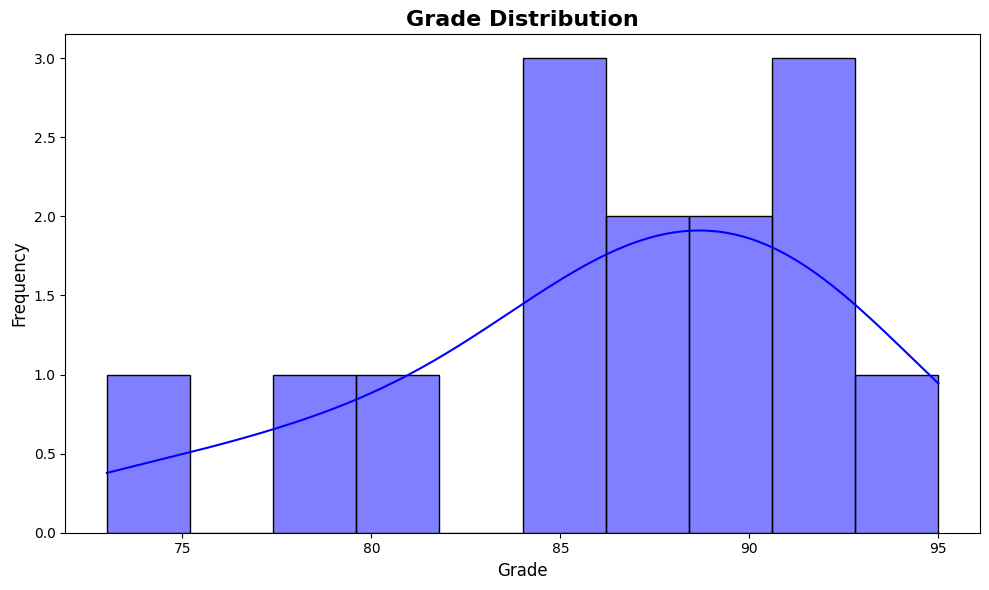

The Grade Range with the Highest Frequency
Range: (86.2, 90.6]


In [3]:
plt.figure(figsize=(10, 6))  
sns.histplot(data=df, x='Grade', bins=10, color='blue', edgecolor='black', kde=True)

# Add a descriptive title and axis labels
plt.title('Grade Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Optimize layout
plt.tight_layout()

# Display the plot
plt.show()

# Identify the grade range with the highest frequency
grade_range_with_highest_freq = df['Grade'].value_counts(bins=5).idxmax()

# Print results
print(f"The Grade Range with the Highest Frequency")
print(f"Range: {grade_range_with_highest_freq}")

### 3. Create an ECDF plot (ecdfplot) for Grade. What is the percentage of students scoring less than 85?

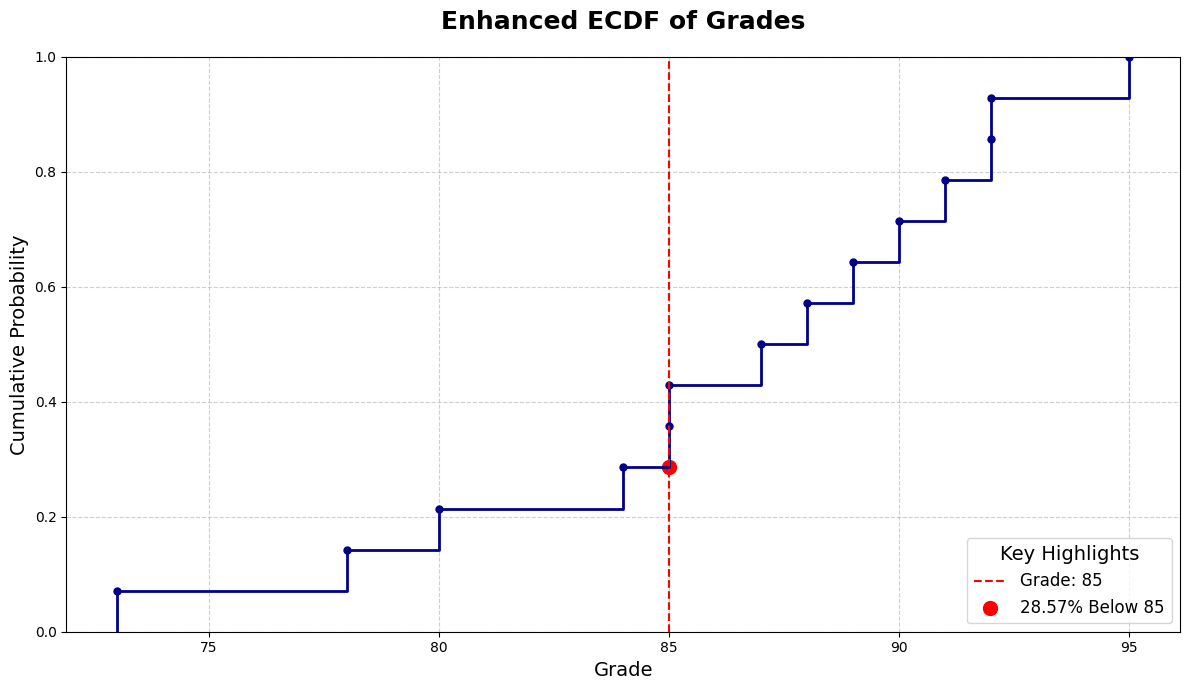

Percentage of Students Scoring Below 85:
28.57% of students scored less than 85


In [4]:
# Create an ECDF plot for grades
plt.figure(figsize=(12, 7)) 

# Enhanced ECDF plot
sns.ecdfplot(data=df, x='Grade', color='darkblue', linewidth=2, marker='o', markersize=5)

# Add grid
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Highlight the 85th percentile for better storytelling
highlight_grade = 85
highlight_value = (df[df['Grade'] < highlight_grade].shape[0] / df.shape[0])
plt.axvline(x=highlight_grade, color='red', linestyle='--', linewidth=1.5, label=f"Grade: {highlight_grade}")
plt.scatter([highlight_grade], [highlight_value], color='red', s=100, label=f"{highlight_value:.2%} Below 85")

# Add title and labels
plt.title('Enhanced ECDF of Grades', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Cumulative Probability', fontsize=14)

# Add a legend to explain key points
plt.legend(title="Key Highlights", fontsize=12, title_fontsize=14, loc='lower right')

# layout
plt.tight_layout()

# Display the plot
plt.show()

# Calculate the percentage of students scoring below 85
percentage_below_85 = (df[df['Grade'] < 85].shape[0] / df.shape[0]) * 100

# Display the result
print(f"Percentage of Students Scoring Below 85:")
print(f"{percentage_below_85:.2f}% of students scored less than 85")

### 4. Create a stripplot showing Grade distribution for each Course. Which course has the most spread in grades?

/var/folders/9s/jgblhq9d0h3bp9n0d4hpy34h0000gn/T/ipykernel_2117/1175020243.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


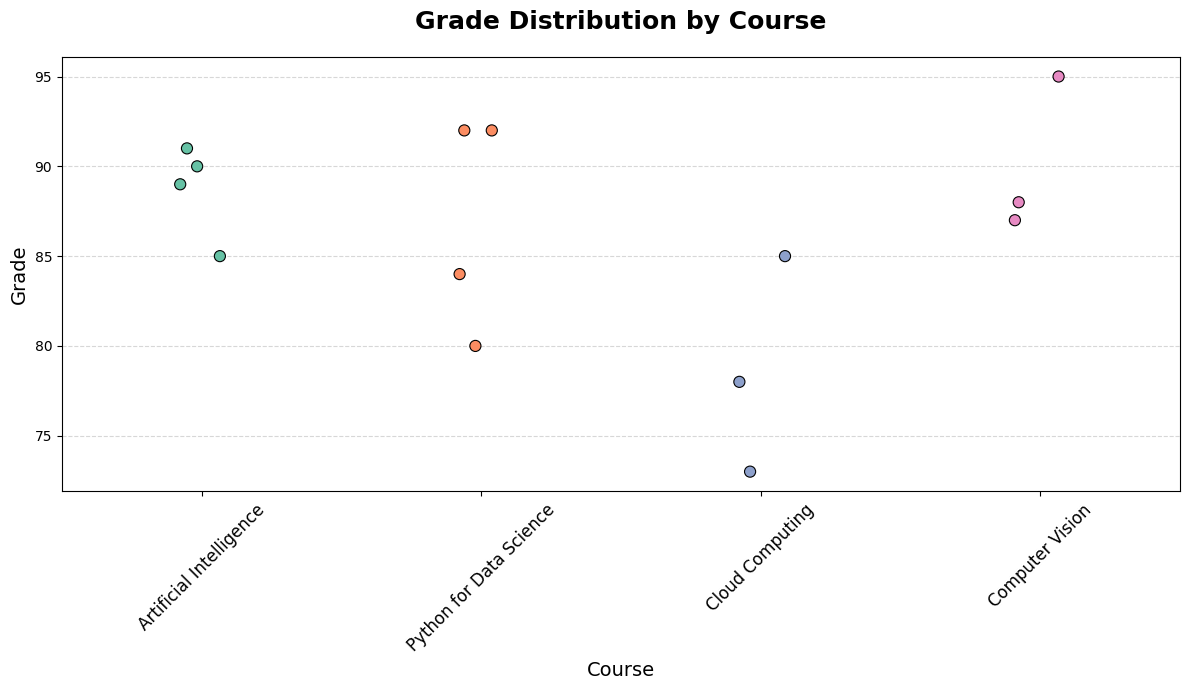

Biggest Disparity in Grades:
Cloud Computing


In [5]:
# Create a strip plot for grade distribution by course
plt.figure(figsize=(12, 7)) 

# Enhanced strip plot
sns.stripplot(
    data=df, 
    x='Course', 
    y='Grade', 
    hue=None,
    jitter=True, 
    size=8, 
    palette='Set2', 
    linewidth=0.8, 
    edgecolor='black'
)

# Add grid
plt.grid(visible=True, linestyle='--', alpha=0.5, axis='y')

# Add a title and axis labels
plt.title('Grade Distribution by Course', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Course', fontsize=14)
plt.ylabel('Grade', fontsize=14)

# Rotate x-axis labels 
plt.xticks(rotation=45, fontsize=12)

# Layout
plt.tight_layout()

# Display the plot
plt.show()

# Calculate the course with the most spread in grades
course_with_most_spread = df.groupby('Course')['Grade'].std().idxmax()

# Display results
print(f"Biggest Disparity in Grades:")
print(f"{course_with_most_spread}")

### 5. Create a swarmplot to show the relationship between Gender and Study Time. Which gender has a higher average study time?

/var/folders/9s/jgblhq9d0h3bp9n0d4hpy34h0000gn/T/ipykernel_2117/1803355703.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(
/var/folders/9s/jgblhq9d0h3bp9n0d4hpy34h0000gn/T/ipykernel_2117/1803355703.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


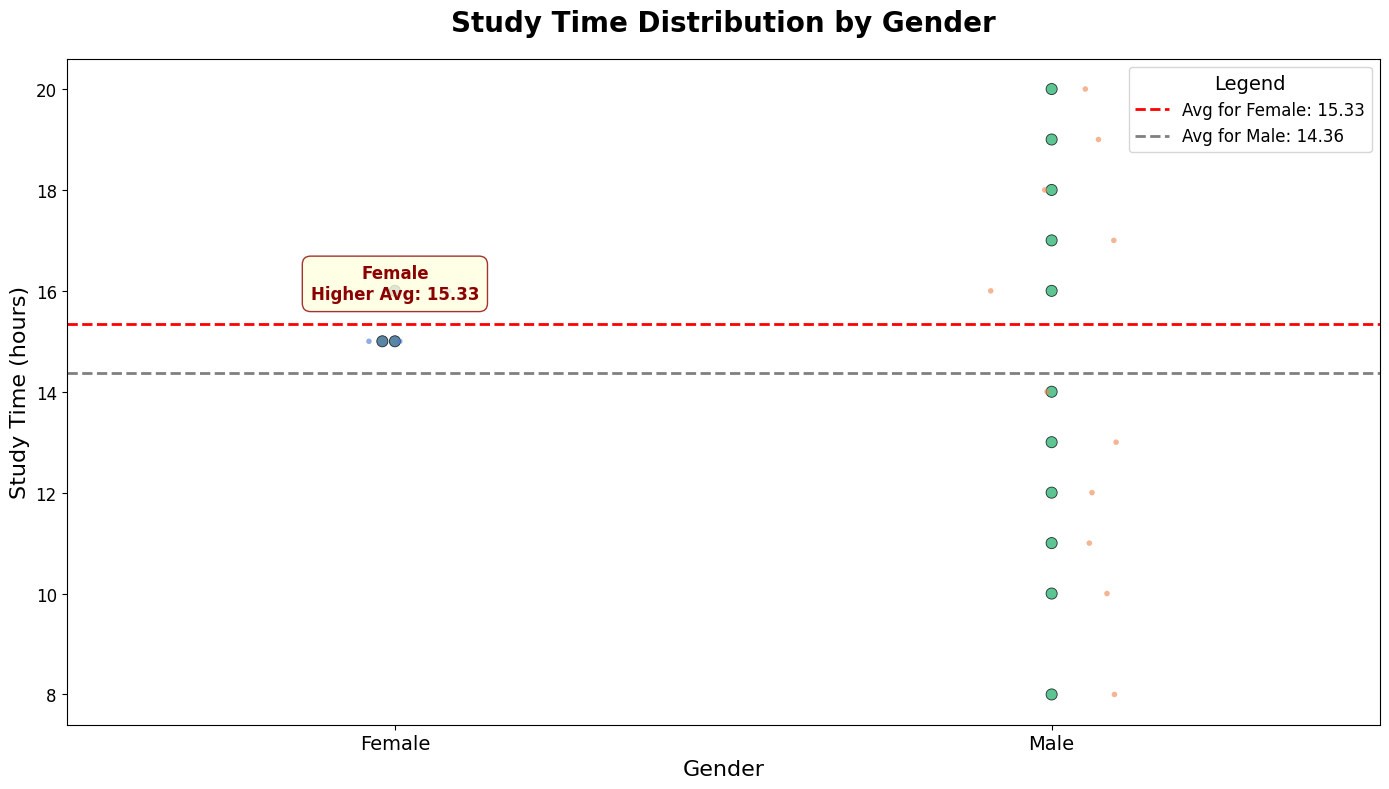

Gender with the Higher Average Study Time
Female: 15.33 hours


In [6]:
# Create a figure for study time by gender
plt.figure(figsize=(14, 8)) 

# Base swarm plot
sns.swarmplot(
    data=df, 
    x='Gender', 
    y='Study Time', 
    palette='viridis', 
    size=8, 
    edgecolor='black', 
    linewidth=0.6,
    alpha=0.8 
)

# Add a strip plot overlay
sns.stripplot(
    data=df, 
    x='Gender', 
    y='Study Time', 
    palette='muted', 
    jitter=True, 
    size=4, 
    alpha=0.6
)

# Calculate the averages and plot horizontal lines
average_study_time_by_gender = df.groupby('Gender')['Study Time'].mean()
for gender, avg in average_study_time_by_gender.items():
    plt.axhline(
        y=avg, 
        color='red' if avg == average_study_time_by_gender.max() else 'gray', 
        linestyle='--', 
        linewidth=2, 
        label=f"Avg for {gender}: {avg:.2f}"
    )

# Highlight the higher average study time with annotation
higher_avg_study_gender = average_study_time_by_gender.idxmax()
higher_avg_study_value = average_study_time_by_gender.max()
plt.text(
    x=0 if higher_avg_study_gender == 'Female' else 1, 
    y=higher_avg_study_value + 0.5, 
    s=f"{higher_avg_study_gender}\nHigher Avg: {higher_avg_study_value:.2f}",
    fontsize=12, 
    color='darkred', 
    fontweight='bold', 
    ha='center',
    bbox=dict(facecolor='lightyellow', alpha=0.8, edgecolor='darkred', boxstyle='round,pad=0.5')
)

# Add title and labels
plt.title('Study Time Distribution by Gender', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Study Time (hours)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(title='Legend', fontsize=12, title_fontsize=14, loc='upper right')

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()

# Display Results
print(f"Gender with the Higher Average Study Time")
print(f"{higher_avg_study_gender}: {higher_avg_study_value:.2f} hours")

### 6. Plot a pointplot to show the average Grade for each Course. Which course has the highest average grade?

/var/folders/9s/jgblhq9d0h3bp9n0d4hpy34h0000gn/T/ipykernel_2117/1741587339.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(
/var/folders/9s/jgblhq9d0h3bp9n0d4hpy34h0000gn/T/ipykernel_2117/1741587339.py:5: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(


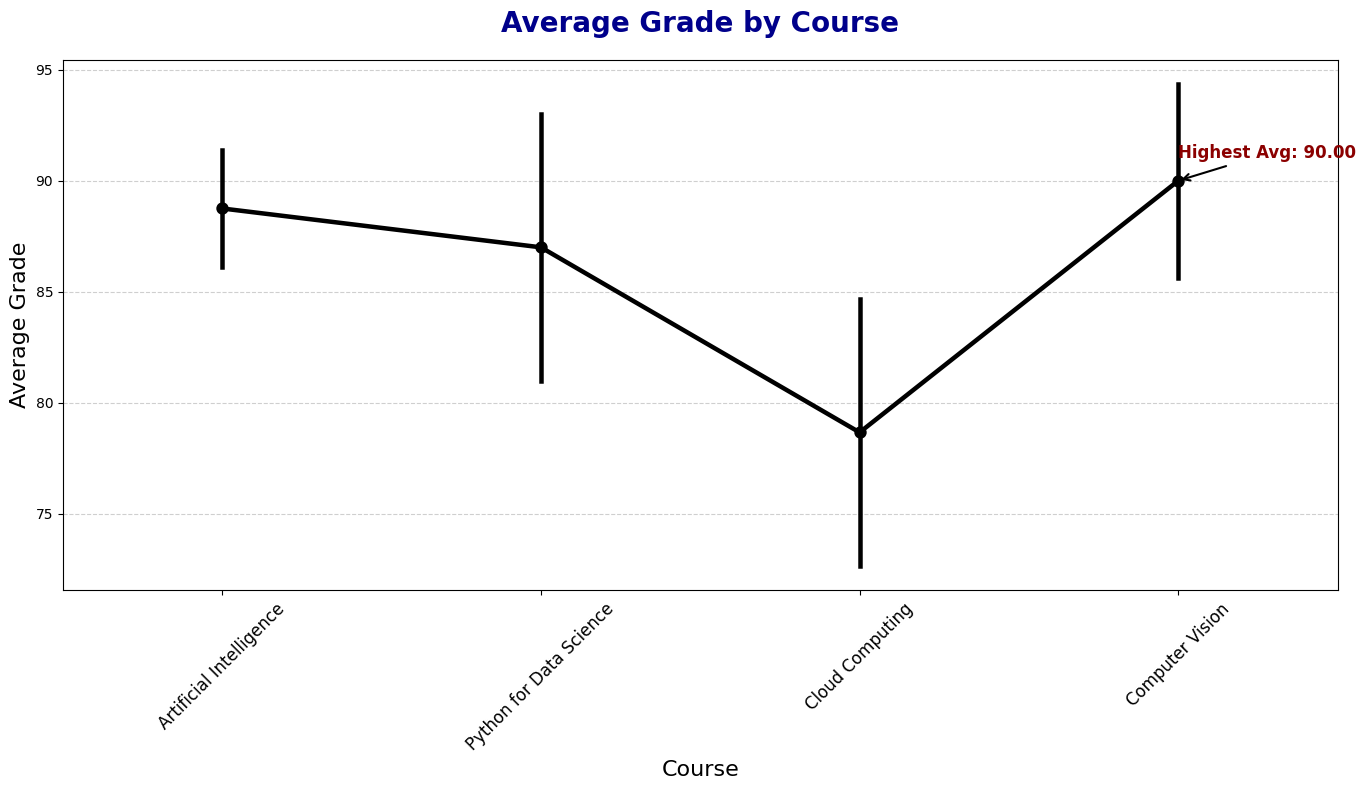

Course with the Highest Average Grade
Computer Vision: 90.00


In [7]:
# Create a point plot for average grade by course
plt.figure(figsize=(14, 8))

# Enhanced point plot
sns.pointplot(
    data=df, 
    x='Course', 
    y='Grade', 
    markers='o', 
    linestyles='-', 
    color='black', 
    scale=1.2,  # Increase marker size
    ci='sd'  # Add error bars for standard deviation
)

# Add grid lines
plt.grid(visible=True, linestyle='--', alpha=0.6, axis='y')

# Add a descriptive title and axis labels
plt.title('Average Grade by Course', fontsize=20, fontweight='bold', pad=20, color='darkblue')
plt.xlabel('Course', fontsize=16)
plt.ylabel('Average Grade', fontsize=16)

# Highlight the course with the highest average grade
highest_avg_grade_course = df.groupby('Course')['Grade'].mean().idxmax()
highest_avg_grade = df.groupby('Course')['Grade'].mean().max()

plt.annotate(
    f"Highest Avg: {highest_avg_grade:.2f}",
    xy=(df['Course'].unique().tolist().index(highest_avg_grade_course), highest_avg_grade),
    xytext=(df['Course'].unique().tolist().index(highest_avg_grade_course), highest_avg_grade + 1),
    arrowprops=dict(facecolor='red', arrowstyle='->', lw=1.5),
    fontsize=12,
    color='darkred',
    fontweight='bold'
)

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=12)

# Optimize layout
plt.tight_layout()

# Display the plot
plt.show()

# Print
print(f"Course with the Highest Average Grade")
print(f"{highest_avg_grade_course}: {highest_avg_grade:.2f}")